In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Import the raw data
url = 'https://raw.githubusercontent.com/liyemaumd/data/main/bank.csv'
data = pd.read_csv(url)

In [3]:
#keeping important features for further process
data = data[['age', 'duration', 'balance', 'job', 'marital', 'education', 'y']]

In [4]:
data_dummies = pd.get_dummies(data, columns = ['job', 'marital', 'education', 'y'])

In [5]:
# Take a look at the new dummy variables
for col in data_dummies.columns:
    print(col)

age
duration
balance
job_admin.
job_blue-collar
job_entrepreneur
job_housemaid
job_management
job_retired
job_self-employed
job_services
job_student
job_technician
job_unemployed
job_unknown
marital_divorced
marital_married
marital_single
education_primary
education_secondary
education_tertiary
education_unknown
y_no
y_yes


In [6]:
# Select a few features for the purpose of demonstration
data_dummies = data_dummies[['age', 'duration', 'balance',
                         'job_management', 'job_retired', 'job_services', 'job_student',
                         'marital_divorced', 'marital_married', 'marital_single',
                         'education_primary', 'education_secondary', 'education_tertiary',
                         'y_yes']]

In [7]:
# Split the data into input and output
X = data_dummies.drop('y_yes', axis = 1)
y = data_dummies['y_yes']

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 123)

### Applying Random Forest on the dataset

In [9]:
rf = RandomForestClassifier(n_estimators = 100,
                            max_depth = 5,
                            class_weight = 'balanced',
                            random_state = 123)

# Fit the model to the training data
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=123)

In [10]:
# Obtain feature importances from the model
rfimp = rf.feature_importances_
rfimp

array([0.12314291, 0.67766889, 0.07463138, 0.00630141, 0.01753686,
       0.00162227, 0.01903586, 0.00210581, 0.01393705, 0.01972773,
       0.00978901, 0.00374952, 0.03075132])

<Axes: xlabel='Importances', ylabel='Features'>

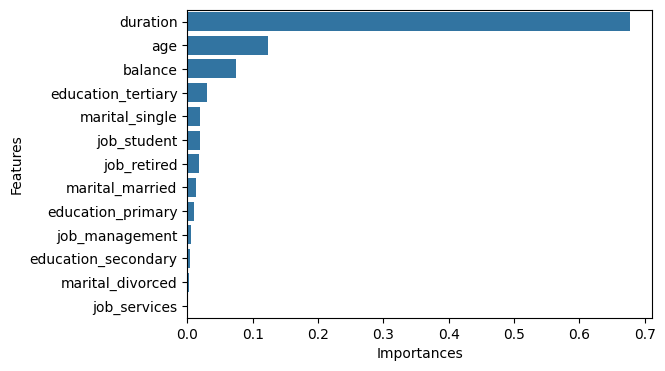

In [11]:
# Visualize the feature importances
plt.figure(figsize = (6, 4))
rfimpdf = pd.DataFrame(data = {'Features': X_train.columns, 'Importances': rfimp})
rfimpdf = rfimpdf.sort_values(by = 'Importances', ascending = False)
sns.barplot(data = rfimpdf, x = 'Importances', y = 'Features', orient = 'h')

In [12]:
# Compute the accuracy scores on the training and validation data
# Obtain predictions
y_pred_train = rf.predict(X_train)
y_pred_val = rf.predict(X_val)

# Compute accuracy scores
train_acc = accuracy_score(y_train, y_pred_train)
val_acc = accuracy_score(y_val, y_pred_val)

In [13]:
print(train_acc)
print(val_acc)

0.7650409201504093
0.7555014928674113


### Hyperparameter Tuning on Random Forest Model

In [14]:
base_grid_model = RandomForestClassifier(class_weight = 'balanced', random_state = 123)

# Define a range of hyperparameter values to tune for and store them in a dictionary
parameters_grid = {'n_estimators': [100, 200],
                   'max_depth': [5, 7]}

In [15]:
# Perform a grid search using the 'GridSearchCV()' method to obtain a grid on which to fit the training data
grid = GridSearchCV(estimator = base_grid_model,
                    param_grid = parameters_grid,
                    scoring = 'roc_auc',
                    verbose = 4)

# Fit the model on the training data
grid_model = grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....max_depth=5, n_estimators=100;, score=0.851 total time=   2.8s
[CV 2/5] END .....max_depth=5, n_estimators=100;, score=0.851 total time=   1.9s
[CV 3/5] END .....max_depth=5, n_estimators=100;, score=0.840 total time=   2.4s
[CV 4/5] END .....max_depth=5, n_estimators=100;, score=0.834 total time=   2.4s
[CV 5/5] END .....max_depth=5, n_estimators=100;, score=0.856 total time=   1.6s
[CV 1/5] END .....max_depth=5, n_estimators=200;, score=0.851 total time=   3.2s
[CV 2/5] END .....max_depth=5, n_estimators=200;, score=0.851 total time=   2.6s
[CV 3/5] END .....max_depth=5, n_estimators=200;, score=0.841 total time=   2.5s
[CV 4/5] END .....max_depth=5, n_estimators=200;, score=0.834 total time=   2.5s
[CV 5/5] END .....max_depth=5, n_estimators=200;, score=0.858 total time=   2.6s
[CV 1/5] END .....max_depth=7, n_estimators=100;, score=0.856 total time=   2.4s
[CV 2/5] END .....max_depth=7, n_estimators=100;,

In [16]:
# Print the optimal values of 'n_estimators' and 'max_depth'
best_n_estimators = grid_model.best_params_['n_estimators']
best_max_depth = grid_model.best_params_['max_depth']
best_roc_auc_score = grid_model.best_score_

In [17]:
print(best_n_estimators)
print(best_max_depth)
print(best_roc_auc_score)

200
7
0.8513786418687118


### Applying Gradient Boosted Tree on the dataset

In [18]:
gbt = LGBMClassifier(n_estimators = 100,
                     max_depth = 5,
                     learning_rate = 0.1,
                     class_weight = 'balanced',
                     random_state = 123)

# Fit the model to the training data
gbt.fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 4245, number of negative: 31923
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 604
[LightGBM] [Info] Number of data points in the train set: 36168, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

LGBMClassifier(class_weight='balanced', max_depth=5, random_state=123)

In [19]:
# Obtain feature importances from the model
gbtimp = gbt.feature_importances_
gbtimp

array([670, 710, 705,  32,  20,  39,  41,  45,  89,  47,  74,  44,  97],
      dtype=int32)

<Axes: xlabel='Importances', ylabel='Features'>

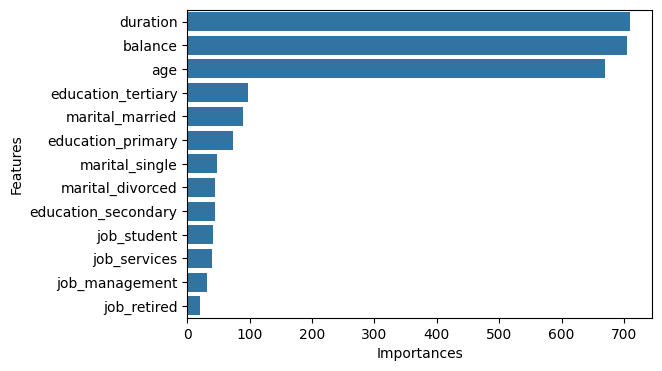

In [20]:
# Visualize the feature importances
plt.figure(figsize = (6, 4))
gbtimpdf = pd.DataFrame(data = {'Features': X_train.columns, 'Importances': gbtimp})
gbtimpdf = gbtimpdf.sort_values(by = 'Importances', ascending = False)
sns.barplot(data = gbtimpdf, x = 'Importances', y = 'Features', orient = 'h')

In [21]:
y_pred_train = gbt.predict(X_train)
y_pred_val = gbt.predict(X_val)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [22]:
# Compute accuracy scores
train_acc = accuracy_score(y_train, y_pred_train)
val_acc = accuracy_score(y_val, y_pred_val)

In [23]:
print(train_acc)
print(val_acc)

0.776487502764875
0.7560544067234325


### Gradient Boosted Tree with Hyperparameter Tuning

In [24]:
base_grid_model = LGBMClassifier(class_weight = 'balanced', random_state = 123)

# Define a range of hyperparameter values to tune for and store them in a dictionary
parameters_grid = {'n_estimators': [50, 100],
                   'max_depth': [7, 9],
                   'learning_rate': [0.06, 0.08]}

In [ ]:
grid = GridSearchCV(estimator = base_grid_model,
                    param_grid = parameters_grid,
                    scoring = 'roc_auc',
                    verbose = 4)

# Fit the model on the training data
grid_model = grid.fit(X_train, y_train)

In [26]:
# Print the optimal values of 'n_estimators', 'max_depth' and 'learning_rate'
best_n_estimators = grid_model.best_params_['n_estimators']
best_max_depth = grid_model.best_params_['max_depth']
best_learning_rate = grid_model.best_params_['learning_rate']
best_roc_auc_score = grid_model.best_score_

In [28]:
print(best_n_estimators)
print(best_max_depth)
print(best_learning_rate)
print(best_roc_auc_score)

100
9
0.06
0.8553748912725313
